In [1]:
import numpy as np
import pandas as pd



In [2]:
data = pd.read_excel('adsor.xlsx')

In [5]:
data

,element,Eads,ioni,elec,zq,zu,xh,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Al,-0.981848,577.5,1.61,3,13,13,NaN,NaN,NaN,NaN,NaN
1,Be,-0.081045,932.0,1.57,2,2,4,NaN,NaN,NaN,NaN,NaN
2,Ca,-0.278873,589.8,1.00,4,2,20,NaN,NaN,NaN,NaN,NaN
3,Cu,-0.748399,745.5,1.9,4,11,29,NaN,NaN,NaN,NaN,NaN
4,K,-0.409136,418.8,0.82,4,1,19,NaN,NaN,NaN,NaN,NaN
5,Li,-0.587539,520.2,0.98,2,1,3,NaN,NaN,NaN,NaN,...
6,Mg,-0.025980,737.7,1.31,3,2,12,NaN,NaN,NaN,NaN,NaN
7,Na,-0.092769,495.8,0.93,3,1,11,NaN,NaN,NaN,NaN,NaN
8,Zn,-0.022261,906.4,1.65,4,12,30,NaN,NaN,NaN,NaN,NaN


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [27]:
x_data = np.array(data.loc[:,'ioni':'xh'])
y_data = np.array(data.loc[:,'Eads'])

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,train_size=0.7,test_size=0.3,random_state=30)

In [30]:
#标准化，归一化
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
x_test

array([[ 0.82604414,  2.08135236,  1.21267813,  1.12720372,  1.72692156],
       [ 1.9579856 ,  1.07621146, -1.69774938, -0.56360186, -1.28515093],
       [-0.11896007, -0.65994099,  1.21267813, -0.56360186,  0.64257546]])

In [33]:
#模型训练
nlf = MLPRegressor(alpha=1e-5,hidden_layer_sizes=(50,50,50), max_iter = 500, random_state=613)
nlf.fit(x_train,y_train)

MLPRegressor(alpha=1e-05, hidden_layer_sizes=(50, 50, 50), max_iter=500,
             random_state=613)

In [34]:
#模型预测
test_pred = nlf.predict(x_test)
train_pred = nlf.predict(x_train)

In [35]:
test_pred

array([-0.43981534, -0.16682287, -0.24084433])

In [37]:
#几个简单的统计函数
import math,cmath
def computecorrelation(x,y):
    x_bar=np.mean(x)
    y_bar=np.mean(y)
    SSR=0
    Varx=0
    Vary=0
    for i in range(0,len(x)):
        SSR+=(x[i]-x_bar)*(y[i]-y_bar)
        Varx+=(x[i]-x_bar)**2
        Vary+=(y[i]-y_bar)**2
    SST=cmath.sqrt(Varx*Vary)
    return SSR/SST
def rmse(x,y):
    z = []
    for i in range(len(x)):
        z.append((x[i] - y[i])**2)
    z_bar = np.mean(z)
    return np.sqrt(z_bar)
def mae(x,y):
    z = []
    for i in range(len(x)):
        z.append(abs(x[i] - y[i]))
    return np.mean(z)
def get_stastics(y1,y2):
    mae1 = mae(y1,y2)
    rmse1 = rmse(y1,y2)
    cor = computecorrelation(y1,y2)
    print('The MAE is: ',mae1)
    print('The RMSE is: ',rmse1)
    print('The correlation parameter is: ',cor)
    return

In [38]:
#获得统计结果
print("训练集统计误差：")
get_stastics(y_train,train_pred)
print("测试集统计误差：")
get_stastics(y_test,test_pred)

训练集统计误差：
The MAE is:  0.028521361471653895
The RMSE is:  0.03541766950466227
The correlation parameter is:  (0.9962563640655844+0j)
测试集统计误差：
The MAE is:  0.14412995050612257
The RMSE is:  0.18621497250955232
The correlation parameter is:  (0.9996223312631469+0j)


In [39]:
import matplotlib.pyplot as plt

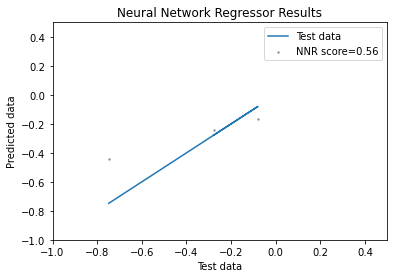

In [44]:
# Plot the results
plt.figure()
s = 2
a = 0.4
plt.plot(y_test,y_test,label="Test data")
plt.scatter(y_test, test_pred, edgecolor='k',
            c="cornflowerblue", s=s, alpha=a,
            label="NNR score=%.2f" % nlf.score(x_test, y_test))

plt.xlim([-1, 0.5])
plt.ylim([-1, 0.5])
plt.xlabel("Test data")
plt.ylabel("Predicted data")
plt.title("Neural Network Regressor Results")
plt.legend()
plt.show()